## We are going to use Principal Components Analysis (PCA) to examine bank failures in any metropolitan statistical area (MSA) in the US. If there is a bank failure episode in any year then that observation is coded as 1 and zero otherwise.
## There are 11 features that could have mutlicollinearity which would lead to overfitting. So, PCA is relevant here. 

In [1]:
# We first import the following packages
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
from sklearn import preprocessing
import sklearn.metrics as sklm
import sklearn.decomposition as skde
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import math

%matplotlib inline

## The dataset spans more than 400 MSAs in the US from 1994-2014. There are 11 independent variables or features. 9 of them are banks' balacnce-sheet based variables like banks' capitalization, loans-to-assets, overhead costs, profitability, liquidity, credit risk, diversification and loan performance. The remaining two features are MSA-level economic conditions like personal income and unemployment rate.

In [2]:
#Importing the bank failure dataset 
data = pd.read_csv('BankFailures.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(9096, 11)
['failure', 'tier1capital_wt', 'loan_asset_wt', 'oca_wt', 'roa_wt', 'liquidity_wt', 'creditrisk_wt', 'diversification_wt', 'chargeoff_rate_wt', 'income_msa', 'ur']


## We first show the pairwise correlations among all variables. 

In [3]:
data.corr(method='pearson', min_periods=1)

,failure,tier1capital_wt,loan_asset_wt,oca_wt,roa_wt,liquidity_wt,creditrisk_wt,diversification_wt,chargeoff_rate_wt,income_msa,ur
failure,1.000000,-0.014277,-0.041015,-0.016961,-0.182427,-0.035320,0.384379,0.100639,0.395274,0.212615,0.224509
tier1capital_wt,-0.014277,1.000000,-0.073789,-0.043558,0.054637,0.243700,-0.068351,-0.126545,-0.019802,-0.029512,0.020182
loan_asset_wt,-0.041015,-0.073789,1.000000,0.891538,0.791704,0.628456,0.007890,-0.009312,-0.002508,-0.048223,-0.055500
oca_wt,-0.016961,-0.043558,0.891538,1.000000,0.766291,0.619759,0.125408,0.248102,0.138619,-0.020949,-0.021556
roa_wt,-0.182427,0.054637,0.791704,0.766291,1.000000,0.604098,-0.300529,0.102660,-0.244524,-0.024215,-0.207244
liquidity_wt,-0.035320,0.243700,0.628456,0.619759,0.604098,1.000000,-0.146435,-0.098938,-0.110061,0.022970,0.011591
creditrisk_wt,0.384379,-0.068351,0.007890,0.125408,-0.300529,-0.146435,1.000000,0.231792,0.931284,0.053874,0.292793
diversification_wt,0.100639,-0.126545,-0.009312,0.248102,0.102660,-0.098938,0.231792,1.000000,0.252134,0.245459,0.001453
chargeoff_rate_wt,0.395274,-0.019802,-0.002508,0.138619,-0.244524,-0.110061,0.931284,0.252134,1.000000,0.071777,0.370003
income_msa,0.212615,-0.029512,-0.048223,-0.020949,-0.024215,0.022970,0.053874,0.245459,0.071777,1.000000,-0.006557


## As we can see above there is high degrees of correlation between several pairs of variables, validating concerns of multicollinearity and hence overfitting.

## Next we will create a numpy array of the features and label.

In [4]:
Features = np.array(data[['tier1capital_wt', 'loan_asset_wt', 'oca_wt', 'roa_wt', 'liquidity_wt', 'creditrisk_wt', 'diversification_wt', 'chargeoff_rate_wt', 'income_msa', 'ur']])
Labels =  np.array(data[['failure']])    

## Now we will partition the dataset into training and test datasets

In [5]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 7277)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Numeric features are scaled or standardized.
## A Zscore scale object is defined using the StandarScaler function from the Scikit Learn preprocessing package. Here each feature is subtracted from its mean and then divided by the standard deviation.
## The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production.
## The training features are scaled using the transform method.

In [6]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## We compute a principal components on the features of the training dataset

In [7]:
#Compute the principal components for the training feature subset
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Print the variance explained for each component and the sum of the variance explained

In [8]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_)) 

[0.27073366 0.19833031 0.14519334 0.12124042 0.0759556  0.07177791
 0.05407363 0.03404551 0.02344666 0.00520296]
1.0000000000000002


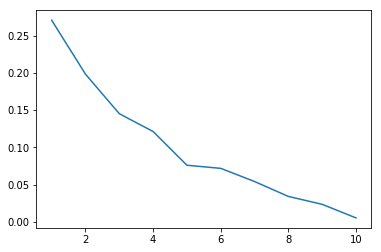

In [9]:
#Explained variance vs. the component
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

#Show the scree plot    
plot_explained(pca_comps)  

## Next we will create a PCA model with a reduced number of components, 5 components.

In [10]:
# Fits a PCA model with 5 components
pca_mod_5 = skde.PCA(n_components = 5)
pca_mod_5.fit(X_train)
Comps = pca_mod_5.transform(X_train)
Comps.shape

(1819, 5)

## Compute and evaluate a logistic regression model using the features transformed by the first 5 principal components.

In [11]:
## Define and fit the logistic regression model
log_mod_5 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55}) 
log_mod_5.fit(Comps, y_train)
print(log_mod_5.intercept_)
print(log_mod_5.coef_)

[-3.2699718]
[[ 0.55208177 -0.56769096 -0.03625213  0.62126205  0.00227756]]


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluating the model by computing Accuracy, ROC, AUC and the Confusion matrix. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive         0              6756
Actual negative         0               521

Accuracy        0.07
AUC             0.50
Macro precision 0.04
Macro recall    0.50
 
           Positive      Negative
Num case     6756           521
Precision    0.00          0.07
Recall       0.00          1.00
F1           0.00          0.13


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


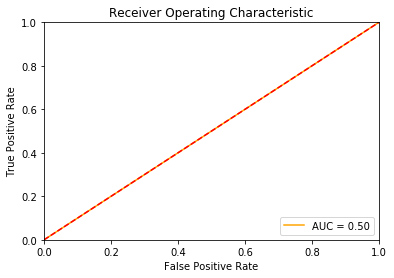

In [12]:
#Evaluate the model
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = log_mod_5.predict_proba(pca_mod_5.transform(X_test))
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)                       

## To improve model performance we next compute and evaluate a logistic regression model using the first 10 principal components. 

In [13]:
pca_mod_10 = skde.PCA(n_components = 10)
pca_mod_10.fit(X_train)
Comps_10 = pca_mod_10.transform(X_train)
Comps_10.shape 

(1819, 10)

## Define and fit the logistic regression model using the 10 components

In [14]:
log_mod_10 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55}) 
log_mod_10.fit(Comps_10, y_train)

C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Score the logistic regression model and display performance metrics

                 Confusion matrix
                 Score positive    Score negative
Actual positive         0              6756
Actual negative         0               521

Accuracy        0.07
AUC             0.50
Macro precision 0.04
Macro recall    0.50
 
           Positive      Negative
Num case     6756           521
Precision    0.00          0.07
Recall       0.00          1.00
F1           0.00          0.13


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


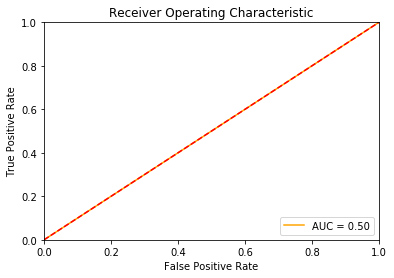

In [15]:
probabilities = log_mod_10.predict_proba(pca_mod_10.transform(X_test))
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

## Perform the cross validation and display the result to check if the difference is really significant between the two models

In [16]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))
  
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc'] 

In [18]:
pca_mod = skde.PCA(n_components = 5)
pca_mod.fit(Features)
Comps = pca_mod.transform(Features)

scores = ms.cross_validate(log_mod_5, Comps, Labels, scoring=scoring,
                        cv=10, return_train_score=False)
print_cv(scores)

         Precision     Recall       AUC
Fold  1    0.583        0.694      0.761
Fold  2    0.568        0.668      0.742
Fold  3    0.565        0.633      0.736
Fold  4    0.557        0.575      0.666
Fold  5    0.598        0.667      0.750
Fold  6    0.575        0.647      0.784
Fold  7    0.552        0.649      0.797
Fold  8    0.540        0.625      0.685
Fold  9    0.567        0.671      0.755
Fold 10    0.529        0.557      0.655
----------------------------------------
Mean       0.563        0.638      0.733
Std        0.019        0.041      0.046


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

In [17]:
pca_mod = skde.PCA(n_components = 10)
pca_mod.fit(Features)
Comps = pca_mod.transform(Features)

scores = ms.cross_validate(log_mod_10, Comps, Labels, scoring=scoring,
                        cv=10, return_train_score=False)
print_cv(scores)

         Precision     Recall       AUC
Fold  1    0.583        0.694      0.761
Fold  2    0.568        0.668      0.742
Fold  3    0.565        0.633      0.736
Fold  4    0.557        0.575      0.666
Fold  5    0.598        0.667      0.750
Fold  6    0.575        0.647      0.784
Fold  7    0.552        0.649      0.797
Fold  8    0.540        0.625      0.685
Fold  9    0.567        0.671      0.755
Fold 10    0.529        0.557      0.655
----------------------------------------
Mean       0.563        0.638      0.733
Std        0.019        0.041      0.046


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

## We do not find any significant difference between the two models. 